In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import*
from numpy import* 
import math as m
import pylab
import numpy as np
from scipy import linalg as LA

**функции из условия**
 
$ f(x) = \sum\limits_{i = 1}^{n}b_i(x_i - a_i)^2, \;\; x \in R^n $  
 
$ f(x) = (x_i - 1)^2 + \alpha\sum\limits_{i = 2}^{n}(x_i - x_{i - 1}^2)^2, \;\; x \in R^n $ 

$ f(x) = \sum\limits_{i = 1}^{n}x_iln(\frac{x_i}{\xi_i}), \;\; x \in R^n $


In [4]:
def f(x, b = None, a = None):
    if b == None:
        b = [1 for i in range(len(x))]
    if a == None:
        a = [1 for i in range(len(x))]
    f_x = 0
    for i, el in enumerate(x):
        f_x += b[i] * (el - a[i])**2
    return f_x


def xln(x, e=None): 
    if e == None:
        e = [1 for i in range(len(x))]
    xln_x = 0
    for i in range(len(x)):
        xln_x += x[i]*m.log(x[i] / e[i]) 
    return xln_x


def h(x, a=None):
    if a == None:
        a = 1
    f_x = (x[0] - 1)**2
    for i in range(1, len(x)):
        f_x += a * (x[i] - x[i-1])**2
    return f_x

In [5]:
def grad_f(x, a=None):
    if a == None:
        a = [1 for i in range(len(x))]
    return 2*np.array([(el-a[i]) for i, el in enumerate(x)])  
def grad_xln(x, e=None):
    if e == None:
        e = [1 for i in range(len(x))]
    return np.array([np.log(el/e[i])+1 for i, el in enumerate(x)]) 

def grad_h(x, a =None):
    if a == None:
        a = 1
    return np.array([2 * (x[0] - 1)] + [a * 2 * (x[i] - x[i-1]) - a * 2 * (x[i+1] - x[i]) for i in range(1, len(x) - 1)]
                    + [a * 2 * (x[-1] - x[-2])])

In [6]:
def goldstein_armijo(f_x_k, grad_f_x_k, g):
    alpha = 0.95 
    betta = 1 - alpha
    N = LA.norm(grad_f_x_k)
    N = N*N 
    phi_1 = lambda eta: f_x_k - eta*alpha*N
    phi_2 = lambda eta: f_x_k - eta*betta*N
    eta_k = 0.49
    
    a = phi_1(eta_k) 
    b = g(eta_k)     
    c = phi_2(eta_k) 
  
   
    while (not(a <= b <= c)): 
        eta_k = eta_k / 2 
        a = phi_1(eta_k)
        b = g(eta_k)
        c = phi_2(eta_k)
       
    return eta_k

def log(arr):
    
    logger = []
    
    for i in range(len(arr)):
        logger.append(arr[i])
    return logger

def gradient_decent(f, grad_f, x_0, e):
  
    global x_current
    x_current = []
    
    p_k = np.array(-1*grad_f(x_0))

    g = lambda lam : f(x_0 + lam * p_k)

    lam_k = goldstein_armijo(f(x_0), p_k, g)

    x_k = x_0 + lam_k * p_k
    
    x_current.append(log(x_k))
    
    p_k = np.array(-1 * grad_f(x_k))
    N = 1

    while LA.norm(p_k) > e:
        N += 1
        g = lambda lam: f(x_k + lam*p_k)          
        lam_k = goldstein_armijo(f(x_k), p_k, g)

        x_k += lam_k * p_k
        x_current.append(log(x_k))
        p_k = np.array(-1 * grad_f(x_k))
        
    return (x_k, f(x_k), N - 1)

print(gradient_decent(f, grad_f, np.array([-10, 10, 10, 10, 10, 10, 10, 10, 10, 10, -10, 20]), 1e-5))
print(gradient_decent(xln, grad_xln, np.array([4, 4, 1, 9]), 1e-5))
print(gradient_decent(h, grad_h, np.array([-100, 100]), 1e-5))

(array([0.99999996, 1.00000003, 1.00000003, 1.00000003, 1.00000003,
       1.00000003, 1.00000003, 1.00000003, 1.00000003, 1.00000003,
       0.99999996, 1.00000006]), 1.3639679963472417e-14, 4)
(array([0.36787954, 0.36787954, 0.36787944, 0.36788303]), -1.4715177646682829, 15)
(array([0.99999999, 0.99999811]), 3.5631359465687908e-12, 5)


In [7]:
def norm_x(func, grad_func, arr,string, xlab, ylab, e=1e-5):
    
    x_k, f_x_k, N = gradientsp(func, grad_func, np.array(arr), e)
    k = [i for i in range(N + 1)]
    norma_x = [np.linalg.norm(x_current[i] - x_k) for i in range(len(x_current))]
    
    plt.plot(k, norma_x, linewidth = 2, label = ylab + '('+xlab+')')
        
    plt.title(string, size = 14)
    plt.xlabel(xlab, size = 14)
    plt.ylabel(ylab, size = 14)
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()
    
def norm_f_x(func, grad_func, arr, col, string, xlab, ylab, e = 1e-5):
    
    x_k, f_x_k, N = gradientsp(func, grad_func, np.array(arr), e)
    k = [i for i in range(N + 1)]
    norma_x = [func(x_current[i]) - f_x_k for i in range(len(x_current))]
    
    plt.plot(k, norma_x, color = col, linewidth = 2, label = ylab + '('+xlab+')')
        
    plt.title(string, size = 14)
    plt.xlabel(xlab, size = 14)
    plt.ylabel(ylab, size = 14)

    plt.legend(loc = 'best')
    plt.grid()
    plt.show()
    


# xlnx, N(e)

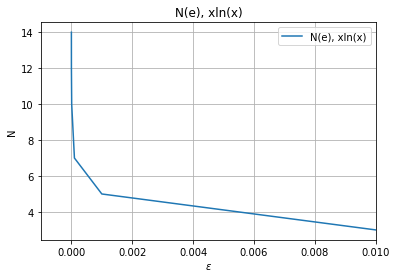

In [18]:
func = xln  
grad_func = grad_xln  
a = [1,1]
 
string = 'N(e), xln(x)'
xlab = '$\epsilon$'
ylab = 'N'
 
eps = []
i = 10
    
while i < 10000000:
    i *= 10
    eps.append(1/i)
arr = [gradient_decent(func, grad_func, np.array(a), e)[-1] for e in eps]
    
        
plt.plot(np.array(eps), arr, label = string)
        
plt.grid()
plt.xlim([-0.001, 0.01])
plt.title(string)
plt.ylabel(ylab)
plt.xlabel(xlab)
plt.legend(loc = 'best')
plt.show()

# xlnx, $\|x^k-x^*\|(k)$

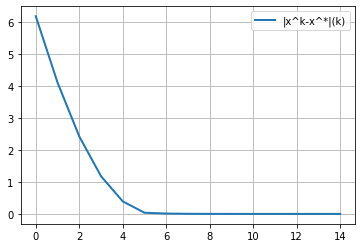

In [17]:
func = xln
grad_func = grad_xln
arr = [3, 4, 5, 6]
string = '|x^k-x^*|(k) for  xln(x)'
xlab = 'k'   
ylab = '|x^k-x^*|'
e = 1e-5
    
x_k, f_x_k, N = gradient_decent(func, grad_func, np.array(arr), e)
k = [i for i in range(N+1)]
norma_x = [np.linalg.norm(x_current[i] - x_k) for i in range(len(x_current))]
    
plt.plot(k, norma_x, linewidth=2, label=ylab+'('+xlab+')')
        

plt.legend(loc='best')
plt.grid()
plt.show()

# xlnx, $\|f(x^k)-f(x^*)\|(k)$

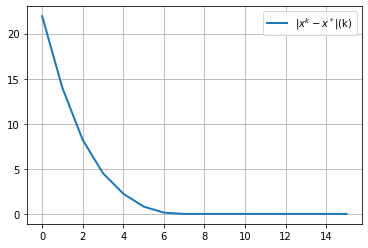

In [10]:
func = xln
grad_func = grad_xln
arr = [4, 4, 1, 9]
string = "|f(x^k)-f(x^*)|(k) for xln(x)"
xlab = 'k'   
ylab = '$\|x^k-x^*\|$'
e = 1e-5
    
x_k, f_x_k, N = gradient_decent(func, grad_func, np.array(arr), e)
k = [i for i in range(N + 1)]
norma_x = [func(x_current[i]) - f_x_k for i in range(len(x_current))]

plt.plot(k, norma_x, linewidth = 2, label = ylab + '('+xlab+')')

plt.legend(loc = 'best')
plt.grid()
plt.show()
    

# f(x), N(e)

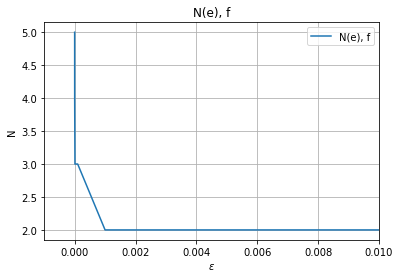

In [11]:
func = f 
grad_func = grad_f  
a = [16,4,9,8,4,7,10,10,10]

string = 'N(e), f'
xlab = '$\epsilon$'
ylab ='N'

eps = []
i = 10
  
while i < 10000000:
    i *= 10
    eps.append(1/i)
arr = [gradient_decent(func, grad_func, np.array(a), e)[-1] for e in eps]
    
plt.plot(np.array(eps), arr, label = string)
      
plt.grid()
plt.xlim([-0.001, 0.01])
plt.title(string)
plt.ylabel(ylab)
plt.xlabel(xlab)
plt.legend(loc = 'best')
plt.show()

# f(x), $\|x^k-x^*\|(k)$

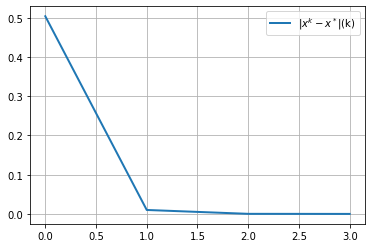

In [12]:
func = f
grad_func = grad_f
arr = [16,4,9,8,4,7,10,10,10]
string = '|x^k-x^*|(k) for  f'
xlab = 'k'   
ylab = '$\|x^k-x^*\|$'
e = 1e-5
  
x_k, f_x_k, N = gradient_decent(func, grad_func, np.array(arr), e)
k = [i for i in range(N + 1)]
norma_x = [np.linalg.norm(x_current[i] - x_k) for i in range(len(x_current))]
  
plt.plot(k, norma_x, linewidth = 2, label = ylab + '('+xlab+')')

plt.legend(loc = 'best')
plt.grid()
plt.show()

# f(x), $\|f(x^k)-f(x^*)\|(k)$

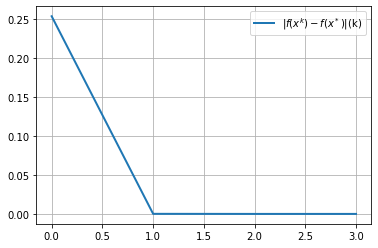

In [13]:
func = f
grad_func = grad_f
arr = [16,4,9,8,4,7,10,10,10]
string = "|f(x^k)-f(x^*)|(k) for f"
xlab = 'k'   
ylab = '$|f(x^k)-f(x^*)|$'
e = 1e-5
 
x_k, f_x_k, N = gradient_decent(func, grad_func, np.array(arr), e)
k = [i for i in range(N+1)]
norma_x = [func(x_current[i]) - f_x_k for i in range(len(x_current))]

plt.plot(k, norma_x, linewidth = 2, label = ylab + '('+xlab+')')

plt.legend(loc = 'best')
plt.grid()
plt.show()

# h(x), N(e)

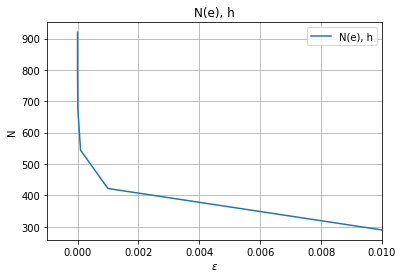

In [14]:
func = h
grad_func = grad_h  
a = [16,4,9,8,4,7,10,10,10]

string = 'N(e), h'
xlab = '$\epsilon$'
ylab ='N'

eps = []
i = 10

while i < 10000000:
    i *= 10
    eps.append(1/i)
arr = [gradient_decent(func, grad_func, np.array(a), e)[-1] for e in eps]
        
plt.plot(np.array(eps), arr, label = string)
     
plt.grid()
plt.xlim([-0.001, 0.01])
plt.title(string)
plt.ylabel(ylab)
plt.xlabel(xlab)
plt.legend(loc = 'best')
plt.show()

# h(x), $\|x^k-x^*\|(k)$

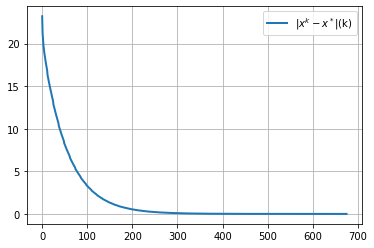

In [15]:
func = h
grad_func = grad_h
arr = [16,4,9,8,4,7,10,10,10]
string = '|x^k-x^*|(k) for  h'# f(x), $\|x^k-x^*\|(k)$
xlab = 'k'   
ylab = '$\|x^k-x^*\|$'
e = 1e-5
 
x_k, f_x_k, N = gradient_decent(func, grad_func, np.array(arr), e)
k = [i for i in range(N + 1)]
norma_x = [np.linalg.norm(x_current[i] - x_k) for i in range(len(x_current))]
 
plt.plot(k, norma_x, linewidth = 2, label = ylab + '('+xlab+')')

plt.legend(loc = 'best')
plt.grid()
plt.show()

# h(x), $\|f(x^k)-f(x^*)\|(k)$

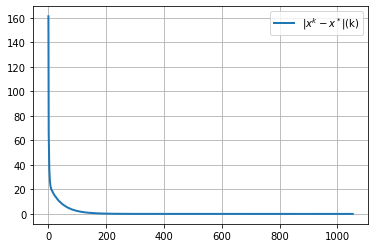

In [16]:
func = h
grad_func = grad_h
arr =  [16,4,9,8,4,7,10,10,10,19,23]
string = "|f(x^k)-f(x^*)|(k) for h"
xlab = 'k'   
ylab = '$\|x^k-x^*\|$'
e = 1e-5# f(x), $\|f(x^k)-f(x^*)\|(k)$
  
x_k, f_x_k, N = gradient_decent(func, grad_func, np.array(arr), e)
k = [i for i in range(N + 1)]
norma_x = [func(x_current[i]) - f_x_k for i in range(len(x_current))]
 
plt.plot(k, norma_x, linewidth = 2, label = ylab + '('+xlab+')')

plt.legend(loc = 'best')
plt.grid()
plt.show() 